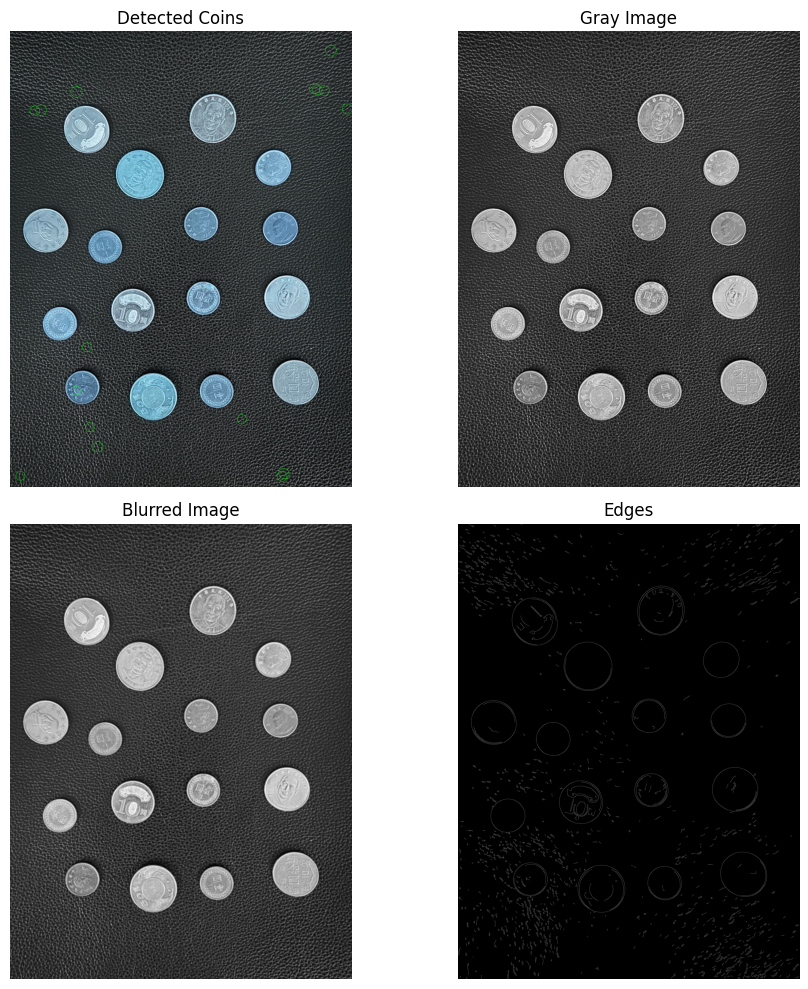

硬幣數量：50元: 2, 10元: 6, 1元: 8
總金額：168元


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def read_image(filename, gray=False):
    im = cv2.imread(filename) 
    if gray: 
        im = gray(im)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB) if im is not None else None

def show_images(col, row, images, titles=[], cmaps=[], scale=2):
    plt.figure(figsize=(row * scale, col * scale))
    titles = titles if titles else ["No Title" for i in range(len(images))]
    cmaps = cmaps if cmaps else [0 for i in images]
    for i in range(len(images)):
        plt.subplot(col, row, i + 1)
        if cmaps[i]: 
            plt.imshow(images[i])
        else:
            plt.imshow(images[i], cmap="gray")
        plt.title(titles[i])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# 讀取影像
image = cv2.imread('01_image.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 前處理 - 模糊
blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)

# 邊緣檢測
edges = cv2.Canny(blurred_image, 50, 150)

# 輪廓檢測
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 設定硬幣的半徑範圍 (根據實際影像可調整)
min_radius = 40  # 最小圓半徑
max_radius = 50  # 最大圓半徑

# 硬幣的面值對應
coin_values = {50: 0, 10: 0, 1: 0}  # 50元, 10元, 1元

# 假設可以計算出硬幣的半徑範圍，這是根據你提供的影像和硬幣的實際大小
for contour in contours:
    # 近似多邊形輪廓
    approx = cv2.approxPolyDP(contour, 3, True)
    
    # 如果輪廓是圓形
    if len(approx) > 5:
        (x, y), radius = cv2.minEnclosingCircle(contour)
        
        # 篩選圓形的大小
        if min_radius < radius < max_radius:
            # 在圖片上畫出圓形
            cv2.circle(image, (int(x), int(y)), int(radius), (0, 255, 0), 2)

            # 根據半徑大小判斷硬幣面額
            if radius > 48:
                coin_values[50] += 1  # 50元硬幣
            elif radius > 44.6:
                coin_values[10] += 1  # 10元硬幣
            else:
                coin_values[1] += 1  # 1元硬幣

# 顯示所有處理過的影像
show_images(2, 2, [image, gray_image, blurred_image, edges], 
            titles=["Detected Coins", "Gray Image", "Blurred Image", "Edges"], 
            cmaps=[0, 0, 0, 0], scale=5)

# 計算總金額
total_money = coin_values[50] * 50 + coin_values[10] * 10 + coin_values[1]
print(f"硬幣數量：50元: {coin_values[50]}, 10元: {coin_values[10]}, 1元: {coin_values[1]}")
print(f"總金額：{total_money}元")
